In [1]:
# 따릉이 데이터 EDA > problem : Hour + Weather variables ~ count(y)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df_train = pd.read_csv('train.csv')

In [25]:
X_train = df_train.iloc[:,1:10] # predictor variable
y_train = df_train.iloc[:,10] # response variable

In [28]:
# summary statistics of X_train
X_train.describe().round(1)

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,1459.0,1457.0,1457.0,1450.0,1457.0,1457.0,1383.0,1369.0,1342.0
mean,11.5,16.7,0.0,2.5,52.2,1405.2,0.0,57.2,30.3
std,6.9,5.2,0.2,1.4,20.4,583.1,0.0,31.8,14.7
min,0.0,3.1,0.0,0.0,7.0,78.0,0.0,9.0,8.0
25%,5.5,12.8,0.0,1.4,36.0,879.0,0.0,36.0,20.0
50%,11.0,16.6,0.0,2.3,51.0,1577.0,0.0,51.0,26.0
75%,17.5,20.1,0.0,3.4,69.0,1994.0,0.1,69.0,37.0
max,23.0,30.0,1.0,8.0,99.0,2000.0,0.1,269.0,90.0


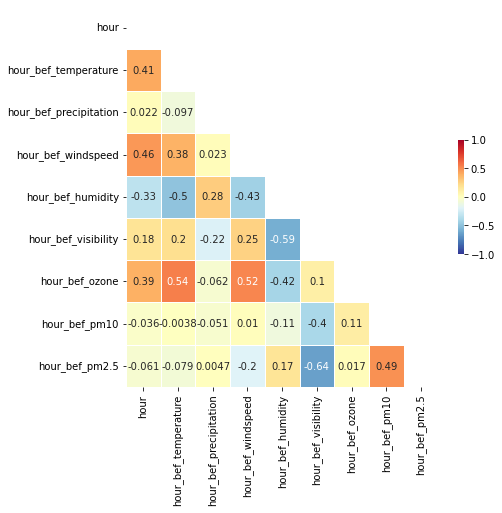

In [44]:
# Correlation among predictors
import seaborn as sns
fig, ax = plt.subplots(figsize=(7,7))

corr = X_train.corr()
mask = np.zeros_like(corr, dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask,
annot = True, linewidth=.5,
cmap = 'RdYlBu_r', cbar_kws = {"shrink": .3}, # shrink cbar(cmap)
vmin = -1, vmax = 1)
plt.show()

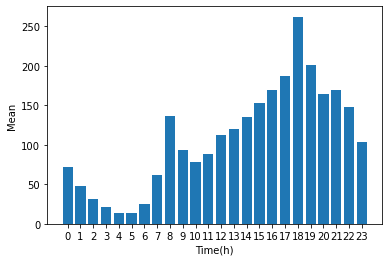

In [71]:
# 시간별 따릉이 현황 파악하기 - bar chart
count_by_hour = pd.DataFrame({'hour' : X_train.iloc[:,0], 
'count' : y_train})
mean = count_by_hour.groupby('hour').mean().round(1).reset_index()
plt.bar(range(len(mean)),mean['count'])
plt.xticks(range(len(mean)), mean['hour'])
plt.ylabel('Mean')
plt.xlabel('Time(h)')
plt.show()